# MARCO SAVINO

# LUCA LAZZATI

# MODELING AND FORECASTING LATIN AMERICA GDP per capita using ARIMA models

Seguendo la metodologia Box-Jenkins, costruiremo un modello di media mobile integrata autoregressiva per prevedere il PIL pro capite LATIN AMERICA, secondo le regole di riconoscimento ARIMA (test stazionario, residui di rumore bianco gaussiano, ...), sotto la Criterio AIC. Utilizzando questo modello ARIMA ottimizzato, genereremo una proiezione per il PIL pro capite fino al 2025. 

Infine, dopo aver costruito un secondo modello ARIMA ottimizzato per proiettare il PIL mondiale al 2025, analizzeremo come la proiezione LATIN AMERICA si combina con la media mondiale. 

Trarremo le nostre conclusioni dalle caratteristiche di base di entrambe le serie temporali previste


Metodologia Box-Jenkins

La metodologia BJ prevede quattro passaggi:

1) Identificazione delle serie storiche

2) Stima del modello: dopo aver identificato i parametri appropriati del modello ARIMA.

3) Diagnostica del modello: dobbiamo verificare che i residui del modello seguano una distribuzione del rumore bianco.

4) Previsioni: possiamo proiettare inferenze predittive statistiche.

In [1]:
pip install chart_studio

     |████████████████████████████████| 81kB 2.6MB/s 


In [0]:
pip install pmdarima

In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.preprocessing import scale
import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
import statsmodels.formula.api as sm
from statsmodels.compat import lzip
import numpy as np
import statsmodels.api as sm
from chart_studio.plotly import plot_mpl
from plotly.offline import init_notebook_mode, iplot_mpl
import plotly.offline as pyo
from plotly.graph_objs import *
#Enable the following library if uploading online
#import plotly.plotly as py
#lets us see the charts in an iPython Notebook
pyo.offline.init_notebook_mode() # run at the start of every ipython
import plotly.io as pio
from IPython.display import Image
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

In [157]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv("/content/drive/My Drive/WDIData.csv")

In [159]:
df['Country Name'].unique()

array(['Arab World', 'Caribbean small states',
       'Central Europe and the Baltics', 'Early-demographic dividend',
       'East Asia & Pacific',
       'East Asia & Pacific (excluding high income)',
       'East Asia & Pacific (IDA & IBRD countries)', 'Euro area',
       'Europe & Central Asia',
       'Europe & Central Asia (excluding high income)',
       'Europe & Central Asia (IDA & IBRD countries)', 'European Union',
       'Fragile and conflict affected situations',
       'Heavily indebted poor countries (HIPC)', 'High income',
       'IBRD only', 'IDA & IBRD total', 'IDA blend', 'IDA only',
       'IDA total', 'Late-demographic dividend',
       'Latin America & Caribbean',
       'Latin America & Caribbean (excluding high income)',
       'Latin America & the Caribbean (IDA & IBRD countries)',
       'Least developed countries: UN classification',
       'Low & middle income', 'Low income', 'Lower middle income',
       'Middle East & North Africa',
       'Middle East & No

# PRE-PROCESSING

ELIMINAZIONE MISSING DATA E DATA PREPARATION


Osservazioni di 58 anni, dal 1960 al 2018

Dal database della Banca mondiale, abbiamo raccolto dati sul PIL per 58 anni dal 1960 al 2018. Il campione è composto da economie Latin America.


In [0]:
city= 'Argentina|Bolivia|Brazil'
city1 = '|Chile|Colombia|Ecuador|Guyana|Mexico|Paraguay|Peru'
city2 = '|Suriname|Uruguay|Venezuela'
cityall = city + city1 + city2
df=df[(df['Country Name'].str.contains(cityall)==True)]
df['Indicator Name']=df['Indicator Name'].str.replace('(',':').str.replace(')',':')

In [0]:
df.rename(columns={"Country Name": "Year"},inplace=True)

In [0]:
df=df[df['Indicator Name'].str.contains("GDP per capita :current US")==True]
df.index=df['Year']
df=df.fillna(method='bfill',axis=1)
df=df.fillna(method='ffill',axis=1)
df=df.iloc[:,4:-2]
ts=df.mean()
ts=pd.DataFrame(ts)
ts.columns=['GDP per capita']

In [0]:
df1_transposed = df.T

In [166]:
traces = []
for col in df1_transposed.columns:
    traces.append({'type' : 'scatter',
                   'showlegend' : False,
                   'marker': {'symbol': 'circle-dot', 'size': 3, 'maxdisplayed' : 5000},
                   'x' : df1_transposed.index,
                   'y' : df1_transposed[col],       
                   'name' : col,
                   'line' : {'width' : 1},
                   'mode' : 'lines+markers'})

data_trace = Data(traces)

layout = {'title' : "Poverty Indicator for All Countries in Forecast ",
         'xaxis' : {'title' : 'Year'},
         'yaxis' : {'title' : 'GDP per capita :current US$'},
         'hovermode' : 'closest'}


fig = Figure(data = data_trace, layout = layout)
fig.show(renderer="colab")

# Time Series Identificazione & Data Exploration

In [167]:
ts.head()

GDP per capita
1960      428.570752
1961      443.920202
1962      465.363672
1963      450.053954
1964      492.746434

In [169]:
X=pd.to_datetime(ts.index)
y=ts['GDP per capita']
layout = go.Layout(title= 'Latin America GDP per capita 1960-2018 current US',
    xaxis = dict(ticks='', nticks=43),
    yaxis = dict(nticks=20))
fig =go.Figure(data=[go.Scatter(x=X,y=y)], layout=layout)
fig.show(renderer="colab")

In [170]:
ts_2=ts
ts_2['log_GDP_pc']=np.log(ts['GDP per capita'])
X=ts['log_GDP_pc'].index
y_1=ts['log_GDP_pc']
layout = go.Layout(title= 'Latin America per capita 1960-2018 current US',
    xaxis = dict(ticks='', nticks=43),
    yaxis = dict(nticks=20),legend=dict(x=0.7, y=1))
trace0 = go.Scatter(x=X,y=y_1, mode = 'lines',name="Latin America GDPpc $ growth 1960-2018", marker = dict(size=12, color='red'))
data = [trace0]
fig =go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Dalla cifra delle serie temporali sopra, l'ispezione visiva del diagramma temporale indica chiaramente che il PIL pro capite Latin America & Caribbean segue un modello di crescita additiva positiva. 

La media e la varianza non sono chiaramente costanti. 

Pertanto, lo consideriamo come una serie temporale non stazionaria.

# Esame dinamico della crescita di serie storiche

In [171]:
ts_1=ts
ts_1['mean']=ts['GDP per capita'].pct_change().fillna(0).mean()
X=ts['GDP per capita'].index
y_2=ts['GDP per capita'].pct_change().fillna(0)
y1=ts_1['mean']
layout = go.Layout(title= 'Latin America GDP per capita growth dynamic 1960-2018 current US',
    xaxis = dict(ticks='', nticks=43),
    yaxis = dict(nticks=20),legend=dict(x=0.7, y=1))
trace0 = go.Scatter(x=X,y=y_2, mode = 'lines',name="Latin America GDPpc $ growth 1960-2018", marker = dict(size=12, color='red'))
trace1 = go.Scatter(x=X,y=y1, mode = 'lines', name="TS Mean ", marker = dict(size=12, color='darkcyan'))
data = [trace0,trace1]
fig =go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Analizzare la dinamica di crescita delle serie storiche; Possiamo identificare alcuni schemi ciclici. Pertanto, dal 1960 al 1975 la crescita è stata tra alti e bassi della serie. 

Come si può vedere ci sono picchi in positivo nel 1973 o picchi negativi come il 2002

Le dinamiche post-depressione dal 2008 sono caratterizzate da una descrescita  dei tassi di crescita con un forte calo nel 2009(addirittura -5/-10%!!). 

Dopo il forte calo dal 2009, si avvia ora ad una tendenza rialzista verso la media del 5% della serie.

In [172]:
returns1 = ts['GDP per capita'].pct_change().fillna(0)
ret_index_1 = (1+returns1).cumprod()
X_1=ret_index_1.index
y_1=ret_index_1.values
layout = go.Layout(title= 'Latin America & Caribbean GDP 1960-2018 accumulative growth (Index 1=1960)',
    xaxis = dict(ticks='', nticks=43),
    yaxis = dict(nticks=20))
data = [go.Bar(x=X_1,y=y_1,marker =dict(color='lightsalmon'))]
fig =go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Questa serie indicizzata (1960 = 1) ci offre una buona prospettiva sulla dinamica di crescita cumulativa della serie. Siamo in grado di identificare una tendenza non molto regolare.

Dal 2009 al 2018 in crescita.

In [173]:
fig = {"data": [{"type": 'violin', "y": y, "box": {"visible": True}, "line": {"color": 'black'},"meanline": 
                 {"visible": True },"fillcolor": 'darkcyan',"opacity": 0.7,"x0": 'Violin'}],
    "layout" : { "title": "Violin Plot - Time series growth dynamic", "yaxis": { "zeroline": False,}}}

fig =go.Figure(data=fig, layout=layout)
fig.show(renderer="colab")

Le trame di violino sono simili agli istogrammi in quanto mostrano una rappresentazione astratta della distribuzione di probabilità dei dati, piuttosto che mostrare il conteggio dei punti di dati che cadono nei contenitori o le statistiche degli ordini, le trame di violino usano la stima della densità del kernel (KDE) per calcolare un empirico distribuzione dei dati.

La trama del violino mostra la presenza di diversi picchi, la loro posizione e "ampiezza relativa".

# ACF

Il primo test per indicare la di stazionarietà deve essere la funzione di autocorrelazione ACF.

L'ACF a ritardo k indicato come:

pk = covariencek / varianza
 
Dove abbiamo ogni covarianza di osservazione a ritardo k. 

Poiché sia la varianza che la covarianza sono misurate nelle stesse unità di misura, la funzione di autocorrelazione è senza unità e si trova tra -1 e 1 di qualsiasi altra correlazione correlata.

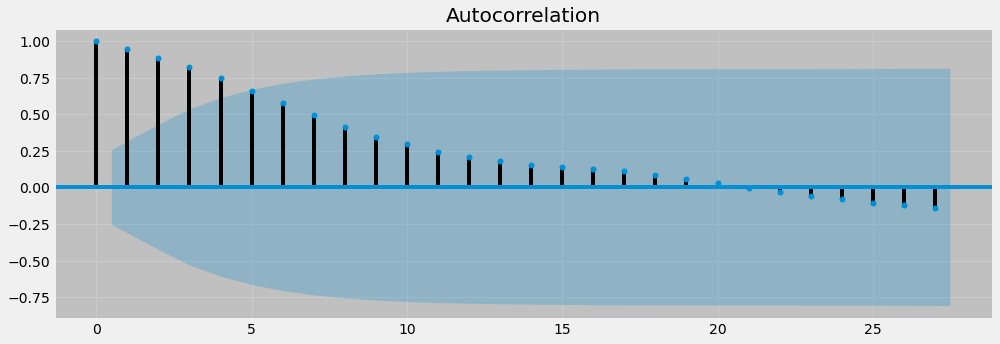

In [175]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(15,5))
ax.set_facecolor('silver')
sm.graphics.tsa.plot_acf(y,ax=ax,lags=27)
plt.show()

Un esame visivo del correlogramma al ritardo 27 conferma che i dati sono chiaramente non stazionari e seguono uno schema di crescita autoregressivo cumulativo e inizia ad accumulare autocorrelazione negativa. È il risultato atteso per una serie temporale additiva in crescita, senza stagionalità. Il margine blu mostra l'intervallo di confidenza al 95%.



Concetto di stazionarietà:

Un processo stocastico è chiamato fortemente stazionario se la distribuzione delle serie storiche originali è esattamente la stessa delle sue versioni ritardate. Pertanto, la distribuzione delle serie temporali è invariata per qualsiasi spostamento del tempo.

Questo presupposto, tuttavia, non si applica alle serie in tempo reale e un presupposto più lieve entra in scena, la stazionarietà della covarianza. Questo significa solo che la media e la varianza delle serie non dovrebbero essere una funzione del tempo (devono essere finite e indipendenti dal tempo) e che l'autocovarianza tra i punti temporali ed è anche finita e dipende solo dalla distanza tra i due punti .

Perché è importante rendere stazionarie le nostre serie storiche? Se le nostre serie aumentano / diminuiscono costantemente nel tempo, significa che o la media non è costante o che le varianze-autocovarianze dipendono dal tempo, il che rende più difficile sviluppare la teoria matematica e i modelli per le serie temporali. In sintesi, possiamo studiare solo i modelli di serie per un determinato periodo e non possiamo costruire con esso modelli ARIMA predittivi generalizzati.

Gaussian white noise:

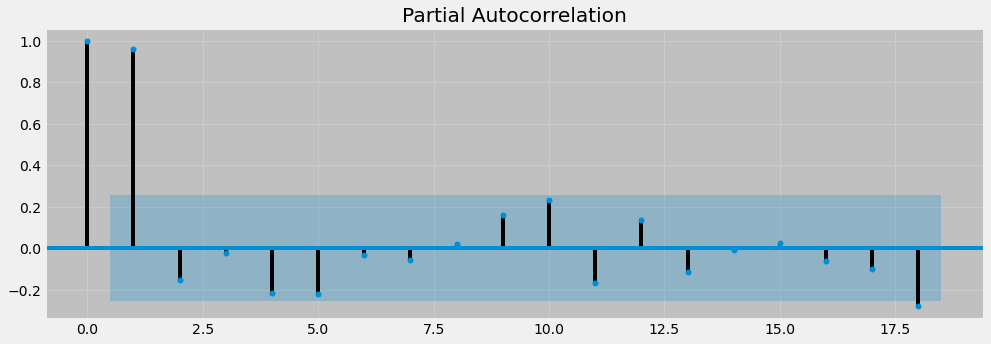

In [176]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(15,5))
ax.set_facecolor('silver')
sm.graphics.tsa.plot_pacf(y,ax=ax)
plt.show()

L'autocorrelazione parziale è la correlazione tra la serie e il suo ritardo, escludendo i contributi dai ritardi intermedi. PACF trasmette la pura correlazione tra un ritardo e la serie.

# Rolling Mean, Std and Dickey-Fuller Test

Sebbene visualizzando le serie temporali sia abbastanza facile identificare una media o variazione variabile nei dati, per una valutazione stazionaria più accurata dobbiamo effettuare il test Dickey-Fuller.

Tracciamento delle statistiche a rotazione: la funzione traccia la media mobile o la deviazione standard mobile. Questo è ancora un metodo visivo
NOTA: media mobile e deviazione standard mobile - In qualsiasi istante "t", prendiamo la media / std dell'ultimo anno che in questo caso è di 12 mesi)

Test Dickey-fuller: questo è uno dei test statistici per il controllo della stazionarietà. Innanzitutto consideriamo l'ipotesi nulla: le serie storiche non sono stazionarie. Il risultato dal resto conterrà la statistica del test e il valore critico per diversi livelli di confidenza. L'idea è di avere statistiche di Test inferiori al valore critico, in questo caso possiamo rifiutare l'ipotesi nulla e dire che questa serie temporale è davvero stazionaria

Maggiori dettagli per il test completo Dickey.
Dettagli della funzione:
significare
Deviazione standard (anziché varianza)
Traccia serie originali
Trama media
Traccia std
Traccia test Dickey-Fuller

In [0]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.rc('xtick', labelsize=8); plt.rc('ytick', labelsize=16) 
    plt.xticks([])
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

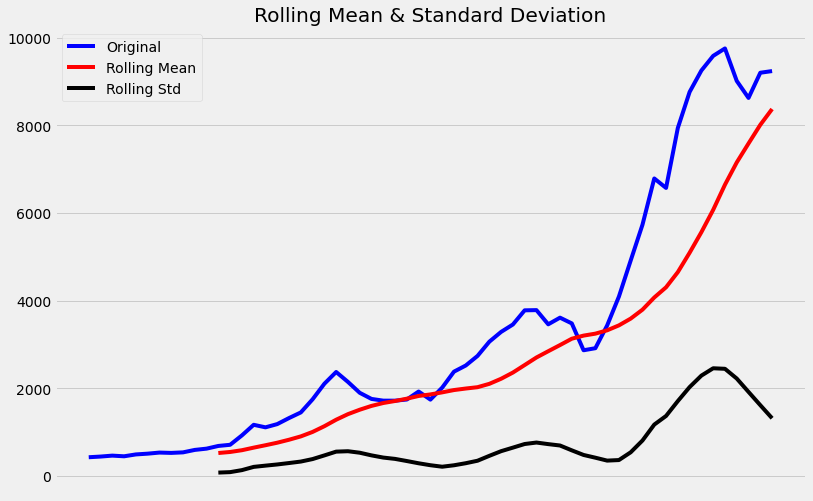

Results of Dickey-Fuller Test:
Test Statistic                  3.771902
p-value                         1.000000
#Lags Used                      9.000000
Number of Observations Used    49.000000
Critical Value (1%)            -3.571472
Critical Value (5%)            -2.922629
Critical Value (10%)           -2.599336
dtype: float64


In [178]:
test_stationarity(y) 

Questo non è buono perché:

• la media sta aumentando anche se lo std è piccolo.

• Stat test è> valore critico al 1%.

• Nota: vengono confrontati i valori con segno e i valori assoluti

# Time series decomposition

La decomposizione delle serie storiche è un compito statistico che decostruisce una serie temporale in più componenti, ognuna delle quali rappresenta una delle categorie di modelli sottostanti. Useremo un modello additivo in quanto sembra che abbiamo a che fare con una tendenza lineare abbastanza costante nel tempo. Un modello moltiplicativo è più appropriato quando stiamo aumentando (o diminuendo) a una velocità non lineare.

Tuttavia, sulla base dei grafici precedenti, sembra che la tendenza in alcuni periodi stia aumentando leggermente a un ritmo superiore rispetto a quello lineare.

In [0]:
ts.index = pd.to_datetime(ts.index)

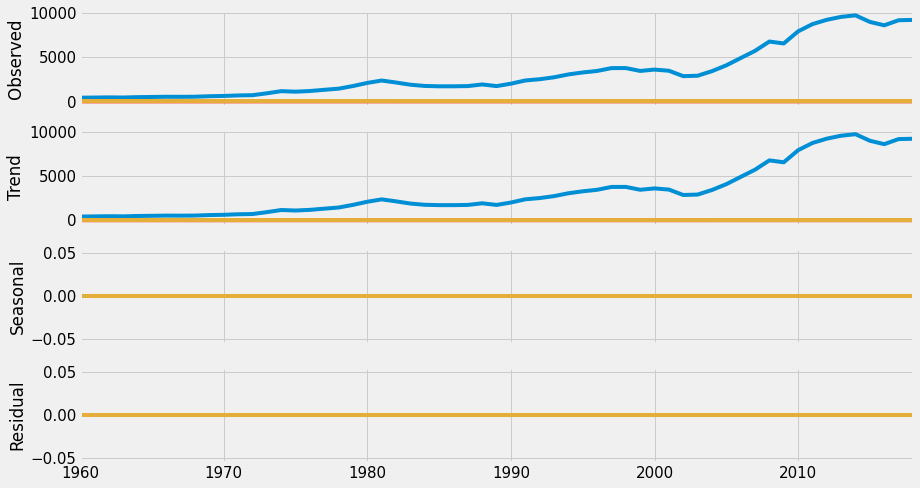

In [180]:
rcParams['figure.figsize'] = 13, 7
SIZE2=15  
plt.rc('xtick', labelsize=SIZE2)    # fontsize of the tick X labels 
plt.rc('ytick', labelsize=SIZE2)    # fontsize of the tick Y labels
decomposition = seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
plt.show()

Le nostre serie storiche si sono separate per tendenza, componenti stagionali e residui. 

Poiché le nostre serie storiche sono annuali, possiamo scartare qualsiasi tipo di stagionalità. Possiamo scartare anche qualsiasi modello sottostante nei residui.

# Stationarizzare le serie storiche
Dobbiamo trasformare i dati per renderli stazionari.


Stazionarietà

Questo è un concetto molto importante nell'analisi delle serie storiche. Per applicare un modello di serie storica, è importante che le serie storiche siano stazionarie; in altre parole, tutte le sue proprietà statistiche (media, varianza) rimangono costanti nel tempo. Ciò avviene fondamentalmente perché se si assume un determinato comportamento nel tempo, è importante che questo comportamento sia lo stesso in futuro per poter prevedere la serie. Esistono molte teorie statistiche per esplorare le serie stazionarie rispetto alle serie non stazionarie. (Così possiamo portare la lotta sul nostro terreno di casa!)
In pratica possiamo supporre che le serie siano stazionarie se ha proprietà statistiche costanti nel tempo e queste proprietà possono essere:
• media costante
• varianza costante
• una varianza automatica che non dipende dal tempo.
Il modo migliore per capire la tua stazionarietà in una serie temporale è quello di dare una occhiata alla trama:

STAZIONANDO LA SERIE TEMPORALE

Esistono due fattori principali che rendono una serie storica non stazionaria. Loro sono:

• Tendenza: media non costante

• Stagionalità: variazione in periodi specifici

L'idea di base è quella di modellare la tendenza e la stagionalità in questa serie, in modo che possiamo rimuoverla e rendere la serie stazionaria. Quindi possiamo andare avanti e applicare le previsioni statistiche alle serie stazionarie. Infine, possiamo convertire i valori previsti in originali applicando i vincoli di tendenza e stagionalità a quelli precedentemente separati.
Iniziamo lavorando sul pezzo di tendenza.
Tendenza
Il primo passo è ridurre la tendenza usando la trasformazione, come possiamo vedere qui che c'è una forte tendenza positiva. Queste trasformazioni possono essere log, sq-rt, root cubo ecc. Fondamentalmente penalizza valori più grandi rispetto a quelli più piccoli. In questo caso useremo la trasformazione logaritmica.

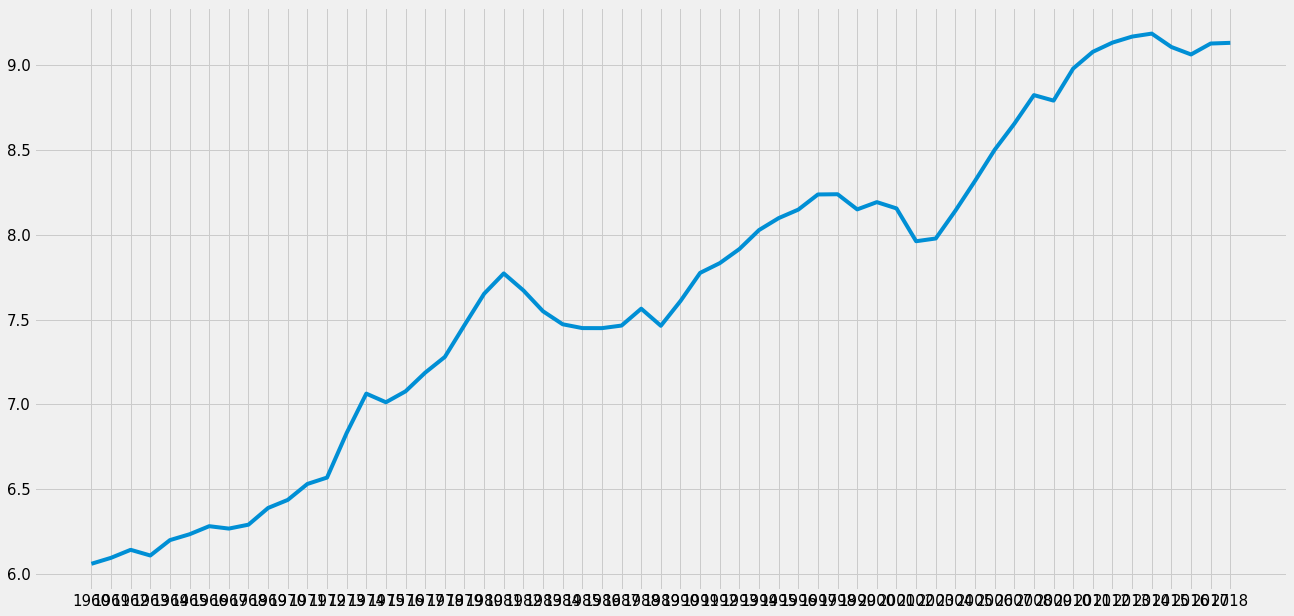

In [182]:
plt.figure(figsize=(20,10))
ts_log = np.log(y)
plt.plot(ts_log)

C'è un po 'di rumore nel realizzare la tendenza in avanti qui. Esistono alcuni metodi per modellare queste tendenze e quindi rimuoverle dalla serie. Alcuni dei più comuni sono:

• Smoothing: usando la media mobile / mobile

• Aggressione: prendendo la media per un certo periodo di tempo (anno / mese)
Userò Smoothing qui.

Smoothing:
Nel livellamento di solito prendiamo i pochi esempi passati (stime a rotazione) Discuteremo due metodi in livellamento: media mobile e media mobile ponderata esponenzialmente.

Media mobile:
Prima prendi x valori consecutivi e questo dipende dalla frequenza se è 1 anno prendiamo 12 valori

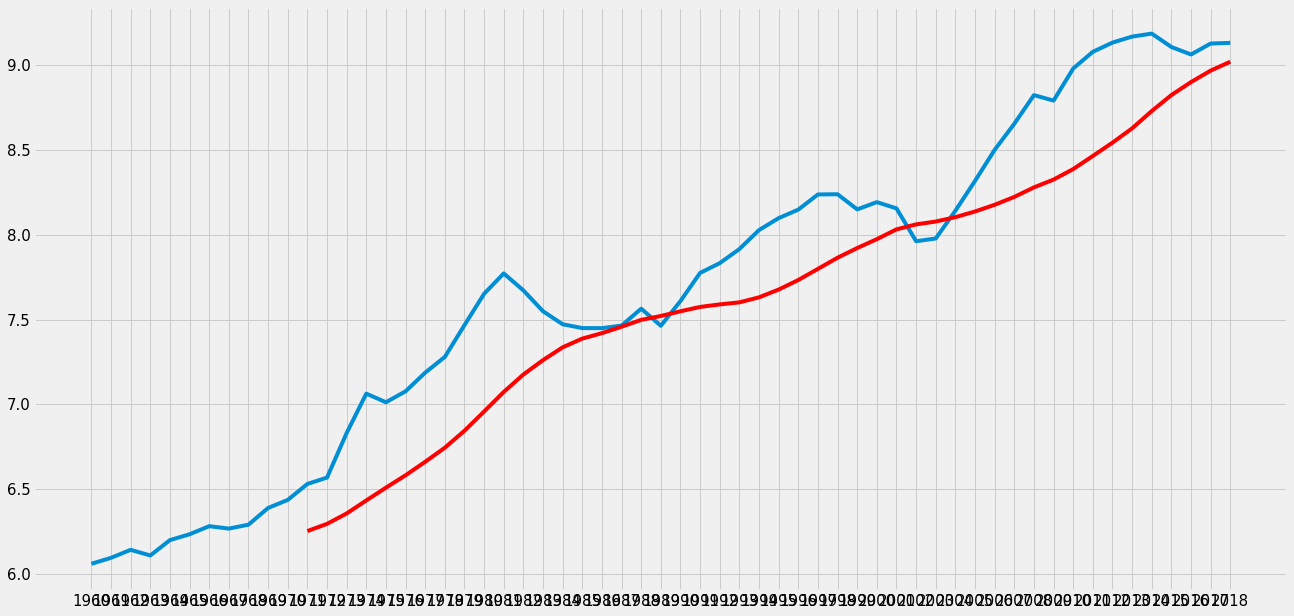

In [183]:
moving_avg = ts_log.rolling(12).mean()
plt.figure(figsize=(20,10))
plt.plot(ts_log)
plt.plot(moving_avg,color = 'red')

In [184]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

1960         NaN
1961         NaN
1962         NaN
1963         NaN
1964         NaN
1965         NaN
1966         NaN
1967         NaN
1968         NaN
1969         NaN
1970         NaN
1971    0.277556
Name: GDP per capita, dtype: float64

In [185]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

1971    0.277556
1972    0.272816
1973    0.474286
1974    0.629556
1975    0.503394
Name: GDP per capita, dtype: float64

Il motivo per cui ci sono valori nulli è perché prendiamo la media dei primi 12, quindi 11 valori sono nulli. 

Possiamo anche vederlo nella rappresentazione visiva. Quindi viene abbandonato per ulteriori analisi. Ora analizziamo la funzione per verificare la stazionarietà.

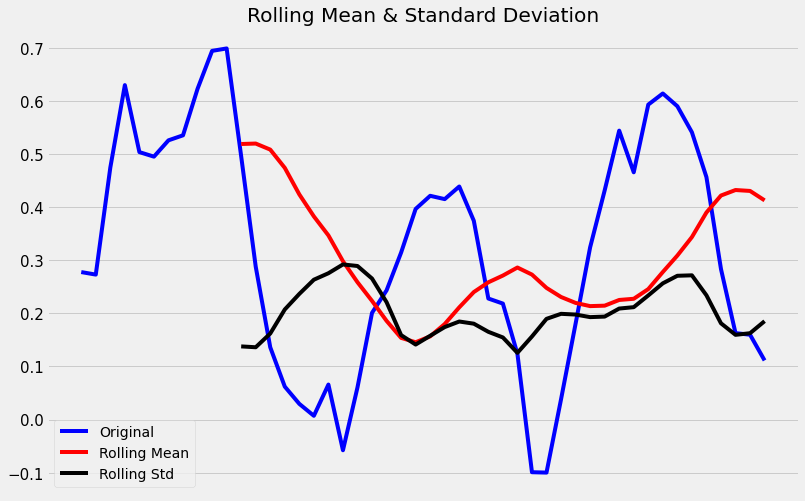

Results of Dickey-Fuller Test:
Test Statistic                 -2.766384
p-value                         0.063238
#Lags Used                      8.000000
Number of Observations Used    39.000000
Critical Value (1%)            -3.610400
Critical Value (5%)            -2.939109
Critical Value (10%)           -2.608063
dtype: float64


In [186]:
test_stationarity(ts_log_moving_avg_diff)

Notiamo due cose:

• I valori di rotazione variano leggermente ma non esiste una tendenza specifica.

• Le statistiche del test sono inferiori ai valori critici del 6%. Questo ci dice che siamo sicuri al 95% che questa serie è stazionaria.

Test Statistic                 -2.766384 --> questo più piccolo

Critical Value (1%)            -3.610400 -->  questo più grande


In questo esempio possiamo facilmente prendere un periodo di tempo (12 mesi per un anno), ma ci sono situazioni in cui l'intervallo di tempo è più complesso come il prezzo delle azioni ecc. Quindi usiamo la media mobile ponderata esponenzialmente (ci sono altre medie mobili ponderate ma per cominciare, usiamolo). I valori precedenti sono assegnati con un fattore di decadimento.

In [187]:
layout = go.Layout(title= 'Latin American GDP First order differencing',
xaxis = dict(ticks='', nticks=43),
yaxis = dict(nticks=20),legend=dict(x=0.7, y=1))

trace0 = go.Scatter(x=ts_log_moving_avg_diff.index, y=ts_log_moving_avg_diff.values, mode = 'lines+markers',name="Latin American GDPpc $ growth 1960-2018", marker = dict(size=12, color='black'))
data = [trace0]
fig =go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

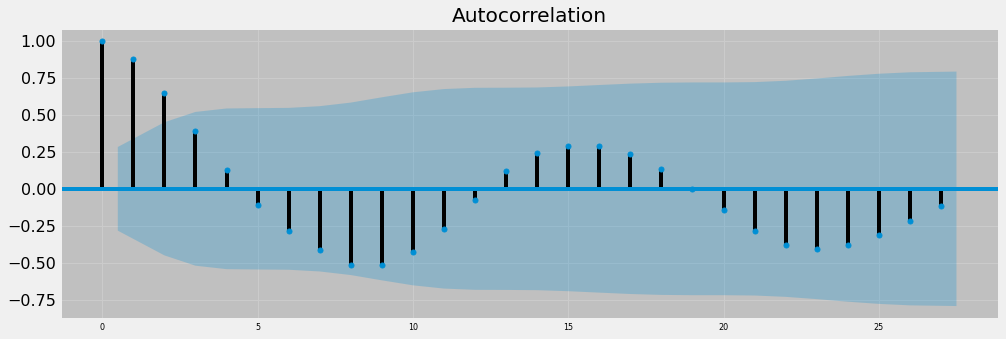

In [188]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_facecolor('silver')
plt.rc('xtick', labelsize=16)
sm.graphics.tsa.plot_acf(ts_log_moving_avg_diff,ax=ax,lags=27)
plt.show()

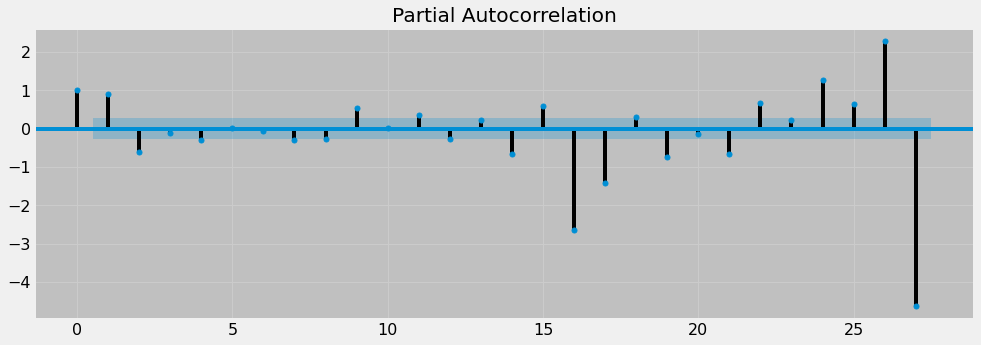

In [189]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_facecolor('silver')
sm.graphics.tsa.plot_pacf(ts_log_moving_avg_diff,ax=ax, lags=27)
plt.show()

Vediamo che la statistica del test di DF è già inferiore rispetto all'1% di significatività. Tuttavia, poiché vi sono picchi nel diagramma ACF che si trova al di fuori della zona insignificante, si può concludere che i residui non sono ancora casuali. Ciò implica che nei residui rimangono dei modelli di informazioni che possono essere estratti da modelli autoregressivi e mobili.

# Time series forecasting with ARIMA


Modello ARIMA (p, d, q)


I modelli ARIMA sono indicati con la notazione ARIMA (p, d, q). Questi tre parametri spiegano la stagionalità, l'andamento e il rumore nei dati:

Per adattare i dati delle serie temporali a un modello ARIMA con i parametri ARIMA (p, d, q) dobbiamo trovare l'impostazione ottimale dei parametri che elimina le informazioni sistematiche e ci lascia con residui di rumore bianco gaussiano. 

ORDINA p

Gli spettacoli PACF trasmettono la pura correlazione tra un ritardo e la serie. L'ordine 3 è il primo sopra la linea di significato. Scegliamo questo valore per mantenere il modello il più semplice possibile.

ORDINE d

Abbiamo già rilevato l'ordine di integrazione 2 per rendere stazionaria la serie.

ORDINA q

Usando il diagramma ACF possiamo misurare il numero di termini MA. Un termine MA è tecnicamente, l'errore della previsione ritardata. L'ordine 3 è il primo sopra la linea di significato; scegliamo questo valore per mantenere il modello il più semplice possibile.



• p: questo è il numero di termini AR (Auto-Regressive). Esempio: se p è 3, il predittore per y (t) sarà y (t-1), y (t-2), y (t-3).

• q: questo è il numero di termini MA (media mobile). Esempio: se p è 3, il predittore per y (t) sarà y (t-1), y (t-2), y (t-3).

• d: questo è il numero di differenze o il numero di differenze non stagionali.



In [192]:
model = pm.auto_arima(ts['GDP per capita'].values, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=834.086, BIC=842.258, Time=0.179 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=849.343, BIC=853.429, Time=0.010 seconds
Fit ARIMA: (1, 2, 0)x(0, 0, 0, 0) (constant=True); AIC=842.312, BIC=848.441, Time=0.025 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=837.305, BIC=843.434, Time=0.063 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 0) (constant=False); AIC=847.343, BIC=849.386, Time=0.008 seconds
Fit ARIMA: (2, 2, 1)x(0, 0, 0, 0) (constant=True); AIC=840.972, BIC=851.187, Time=0.108 seconds
Fit ARIMA: (1, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=841.304, BIC=851.520, Time=0.087 seconds
Near non-invertible roots for order (1, 2, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (0, 2, 2)x(0, 0, 0, 0) (constant=True); AIC=835.539, BIC=843.711, Time=0.174 seconds
Near non-invertible roots for 

In [193]:
mod = sm.tsa.statespace.SARIMAX(ts['GDP per capita'].values,order=(1,2,1),enforce_stationarity=True,enforce_invertibility=True, maxiter=1000, method='css')
results1 = mod.fit()
print(results1.summary())

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   59
Model:               SARIMAX(1, 2, 1)   Log Likelihood                -413.850
Date:                Sun, 22 Mar 2020   AIC                            833.701
Time:                        17:27:51   BIC                            839.830
Sample:                             0   HQIC                           836.083
                                 - 59                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3862      0.106      3.627      0.000       0.178       0.595
ma.L1         -0.9641      0.043    -22.640      0.000      -1.048      -0.881
sigma2      1.152e+05   1.39e+04      8.260      0.0

Dovremmo sempre eseguire la diagnostica dei modelli per indagare su comportamenti insoliti.

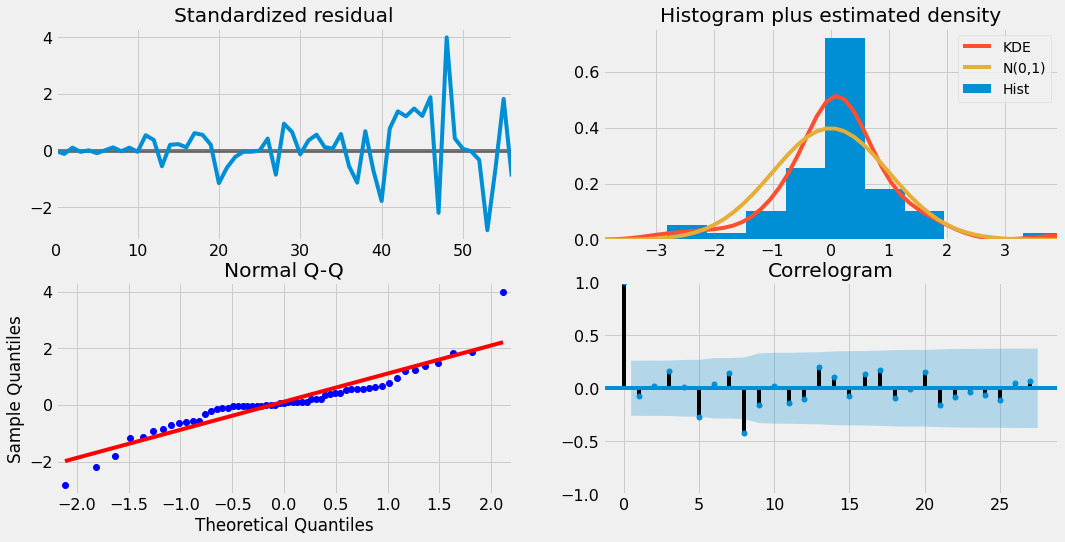

In [194]:
results1.plot_diagnostics(figsize=(16, 8),lags=27)
plt.show()

Non è perfetto, tuttavia, la diagnostica del nostro modello suggerisce che i residui del modello sono quasi normalmente distribuiti.

La trama residua standardizzata del modello montato nell'angolo in alto a destra sembra essere un rumore bianco in quanto non mostra alcun motivo. 

Il diagramma dell'istogramma nella coppia di angoli in alto a destra con la stima della densità del kernel (linea arancione) indica che le serie temporali sono quasi normalmente distribuite (linea verde) e approssimano il rumore bianco gaussiano.

Il correlogramma (grafico di autocorrelazione) conferma questo risultato, poiché i residui delle serie temporali mostrano basse correlazioni con i residui ritardati. Non ci sono picchi statisticamente significativi al livello di significatività del 5%. Quindi possiamo affermare che il correlogramma assomiglia a quello del rumore bianco discreto.

Possiamo concludere che il modello si adatta bene ai dati delle nostre serie temporali.


Quindi, come interpretare la diagnostica della trama?

In alto a sinistra: gli errori residui sembrano fluttuare attorno a una media di zero e presentare una varianza uniforme.

In alto a destra: il grafico della densità suggerisce una distribuzione normale con zero medio.

In basso a sinistra: tutti i punti dovrebbero cadere perfettamente in linea con la linea rossa. Qualsiasi deviazione significativa implicherebbe che la distribuzione è distorta.

In basso a destra: il diagramma di correlogramma, noto anche come ACF, mostra che gli errori residui non sono autocorrelati. Qualsiasi autocorrelazione implicherebbe che esiste un modello negli errori residui che non sono spiegati nel modello. Quindi dovrai cercare più X (predittori) per il modello.

# FORECAST

In [0]:
prediction_summary=results1.get_prediction(start=0, end=65).summary_frame()
prediction_summary.index=['1960-01-01','1961-01-01','1962-01-01','1963-01-01'
'1964-01-01','1965-01-01','1966-01-01','1967-01-01','1968-01-01','1969-01-01','1970-01-01','1971-01-01','1972-01-01','1973-01-01','1974-01-01','1975-01-01',
'1976-01-01','1977-01-01','1978-01-01','1979-01-01','1980-01-01','1981-01-01','1982-01-01','1983-01-01','1984-01-01','1985-01-01','1985-01-01','1986-01-01','1987-01-01','1988-01-01','1989-01-01',
'1990-01-01', '1991-01-01','1992-01-01','1993-01-01', '1994-01-01', '1995-01-01','1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01','2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
'2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01','2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01','2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01','2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
'2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01','2024-01-01', '2025-01-01']

In [0]:
forecast=results1.predict(start=0,end=65)
forecast=pd.DataFrame(forecast, columns = ['projection'])
forecast.index=['1960','1961','1962','1963','1964','1965','1966','1967','1968','1969','1970','1971','1972','1973','1974','1975','1976','1977','1978',
'1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998','1999', 
'2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007','2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
'2017','2018','2019','2020','2021','2022','2023','2024','2025']

In [199]:
# Create traces
trace0 = go.Scatter(
    x = ts.index,
    y = ts['GDP per capita'],
    mode = 'markers',
    name = 'Actual GDP PPP',marker = dict(size=7))
trace1 = go.Scatter(
    x = forecast.iloc[2:].index,
    y = forecast.iloc[2:].projection,
    mode = 'lines+markers',
    name = 'Arima model (3,1,3) in sample model & 2025 projection',marker = dict(size=7),opacity = 0.6)


layout = go.Layout(title= 'In-sample prediction and out-of-sample forecasting to 2025 per capita - GDP US$ Latin America',
    xaxis = dict(ticks='', nticks=43),
    yaxis = dict(nticks=20), legend=dict(x=0.1, y=1))
data = [trace0, trace1]
fig =go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

In [200]:
# Create traces
trace0 = go.Scatter(
    x = ts.index,
    y = ts['GDP per capita'],
    mode = 'markers',
    name = 'Actual GDP',marker = dict(size=7))


trace2 =go.Scatter(x=prediction_summary.iloc[2:].index, y=prediction_summary.iloc[2:].mean_ci_lower.values, name='ARIMA model 95% Lower CI', mode = 'lines',
                   marker = dict(size=10, color='red'),opacity = 0.3)

trace3 =go.Scatter(x=prediction_summary.iloc[2:].index, y=prediction_summary.iloc[2:].mean_ci_upper.values,name='ARIMA model 95% Upper CI', mode = 'lines',
                   marker = dict(size=10, color='red'),opacity = 0.3)

trace4 =go.Scatter(x=prediction_summary.iloc[59:].index, y=prediction_summary.iloc[59:]['mean'].values,name='ARIMA model mean projected values', mode = 'markers',
                   marker = dict(size=10, color='red'),opacity = 0.3)

layout = go.Layout(title= 'In-sample prediction and out-of-sample forecasting 95% CI - GDPpc US$ Latin America',
    xaxis = dict(ticks='', nticks=43),
    yaxis = dict(nticks=20), legend=dict(x=0.1, y=1))
data = [trace0,trace2,trace3,trace4]
fig =go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Vediamo che le nostre prestazioni nel campione mostrano un allineamento molto forte e, a parte l'inizio della serie, il nostro errore relativo è compreso nell'intervallo dell'intervallo di confidenza al 95%, che è relativamente forte. Il nostro modello ARIMA (1,2,1) prevede che senza alcun cambiamento strutturale economico sottostante; con gli attuali modelli di crescita, il PIL pro capite in Latin America supererà la barriera di 10.000 dollari.

Dobbiamo tenere conto del fatto che i risultati di previsione di questo modello sono solo valori previsti, tenendo conto della struttura sottostante delle Serie storiche negli ultimi 58 anni.

# Confronto di serie storiche con la media mondiale

In [0]:
df3=pd.read_csv('/content/drive/My Drive/WDIData.csv')
df3=df3[df3['Country Name']=='World']
df3['Indicator Name']=df3['Indicator Name'].str.replace('(',':').str.replace(')',':')
df3=df3[df3['Indicator Name'].str.contains("GDP per capita :current US")==True]
df3.index=df3['Country Name']
df3=df3.dropna(axis=1)
df3.drop(['Country Name','Country Code','Indicator Name','Indicator Code'], axis=1, inplace=True)
ts2=df3 ; ts2=ts2.T
ts2.index = pd.to_datetime(ts2.index)
ts2.columns=['GDP per capita']
ts2['world_percentatge']=ts['GDP per capita']/ts2['GDP per capita']

In [202]:
layout = go.Layout(title= 'World & Latin America GDP per capita constant US$ 1960-2018',
xaxis = dict(ticks='', nticks=43),
yaxis = dict(nticks=20), legend=dict(x=0.1, y=1))
trace0 =go.Scatter(x=ts2.index, y=ts2['GDP per capita'],
                   name='World GDP per capita TS 1960-2018', marker = dict(size=12, color='green'))
trace1 =go.Scatter(x=ts.index,y=ts['GDP per capita'],
                   name='Latin America GDP per capita TS 1960-2018',marker = dict(size=12, color='blue'))
data = [trace0]
fig =go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Sebbene entrambe le serie siano stazionarie, mentre il PIL pro capite mondiale mostra un modello di crescita molto più esponenziale, Latin America segue un modello di crescita additiva più costante.

#  Distribuzione della crescita di entrambi i TS

In [0]:
LA_growth=ts['GDP per capita'].pct_change().fillna(0)
World_growth=ts2['GDP per capita'].pct_change().fillna(0)

In [205]:
layout = go.Layout(title= 'Latin America vs World GDP per capita growth % 1960-2018',
    xaxis = dict(ticks='', nticks=43), yaxis = dict(nticks=20),legend=dict(x=0.1, y=1))

trace0 =go.Scatter(x=ts.index, y=LA_growth*100, name='Latin America GDP per capita anual growth', mode = 'markers+lines',
                   marker = dict(size=12, color='blue'))

trace1 =go.Scatter(x=ts2.index, y=World_growth*100,name='World GDP per capita anual growth', mode = 'markers+lines',
                   marker = dict(size=12, color='green'))
data = [trace0, trace1]
fig =go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Si può individuare che il pil mondiale rispetto al pil dell'America Latina e delle isole caraibiche è leggeremente maggiore... (ALTRE CONSTATAZIONi)

Possiamo vedere come dal 1960 c'è stata una crescente divergenza tra il PIL pro capite Latin America e la media mondiale.

Latin America nel 2018 rappresentava solo il 0.4% circa. In questi 58 anni Latin America ha diviso dal PIL Pro Capite Mondiale di 4 punti e mezzo dalla media mondiale.

# Totale Latin America & Caribbean GDPpc come % della Media nel Mondo negli anni 1960-2018

In [206]:
ts2['world_percentatge']=ts/ts2
layout = go.Layout(title= 'Latin America GDP per capita annual ratio with the world average 1960-2018',
    xaxis = dict(ticks='', nticks=43),
    yaxis = dict(nticks=20))
trace0 =go.Scatter(x=ts2.index, y=ts2['world_percentatge'],
                   mode = 'markers+lines',marker = dict(size=12, color='coral'))
data = [trace0]
fig =go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

# Modello ARIMA PIL pro capite mondiale

In [0]:
ts2.index = pd.to_datetime(ts2.index)

# Come eseguire Auto Arima Forecast in Python

auto_arima () utilizza un approccio graduale per cercare più combinazioni di parametri p, d, q e sceglie il modello migliore che ha il minimo AIC.

In [208]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm


model = pm.auto_arima(ts2['GDP per capita'].values, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=822.526, BIC=830.768, Time=0.175 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=826.676, BIC=830.797, Time=0.008 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=824.546, BIC=830.727, Time=0.019 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=821.605, BIC=827.786, Time=0.074 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=844.776, BIC=846.836, Time=0.007 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=822.400, BIC=830.642, Time=0.073 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=824.405, BIC=834.707, Time=0.102 seconds
Total fit time: 0.480 seconds
                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                   59
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -407.803
Date:            

# Diagrammi diagnostici per residui standardizzati

In [209]:
mod = sm.tsa.statespace.SARIMAX((ts2['GDP per capita']), order=(0,1,1),
                                enforce_stationarity=True, enforce_invertibility=True,)
results2 = mod.fit()
print(results2.summary())

                           Statespace Model Results                           
Dep. Variable:         GDP per capita   No. Observations:                   59
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -413.389
Date:                Sun, 22 Mar 2020   AIC                            830.777
Time:                        17:34:43   BIC                            834.898
Sample:                    01-01-1960   HQIC                           832.383
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5444      0.091      6.007      0.000       0.367       0.722
sigma2      9.036e+04   1.29e+04      6.993      0.000     6.5e+04    1.16e+05
Ljung-Box (Q):                       18.86   Jarque-

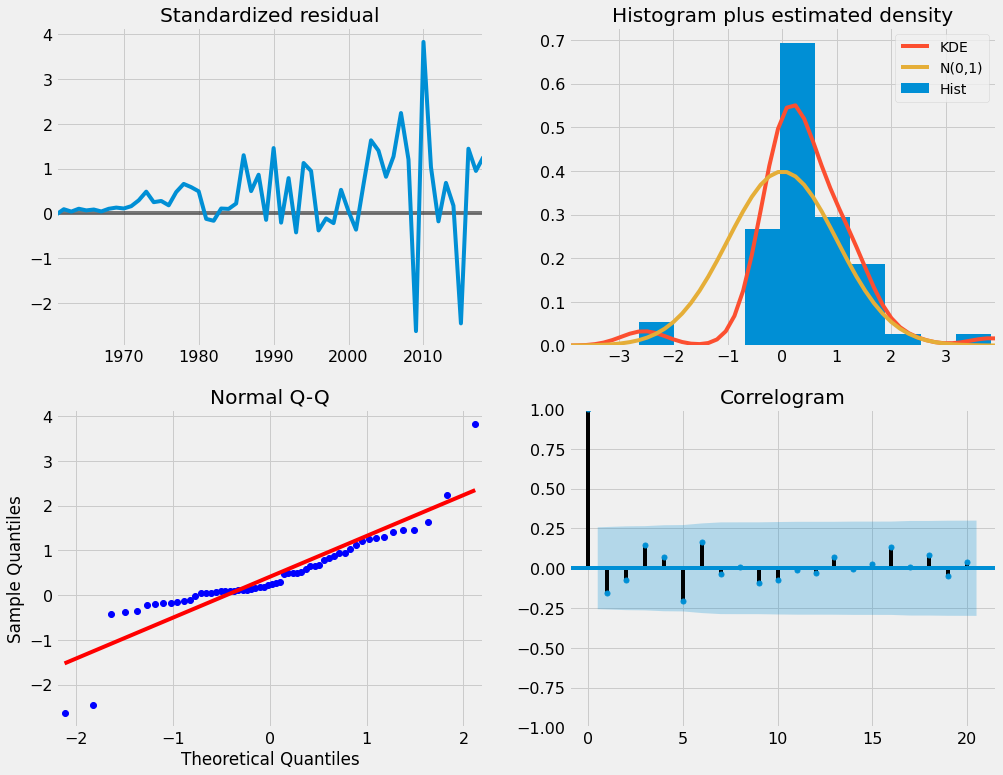

In [210]:
results2.plot_diagnostics(figsize=(15, 12),lags=20)
plt.show()

Il modello (0, 1, 1) ARIMA montato è adeguato poiché i residui standardizzati mostrano un modello di rumore gaussiano bianco e fluttuano attorno a 0.

Il 2009, il 2010 e 2016 rappresenta un enormi outlier, tuttavia, anche se non porta alcun comportamento informativo di base al modello, non possiamo omettere quest'anno per semplificare la procedura di modellazione (stazionaria e discreta residui di rumore bianco) perché con un campione così piccolo, l'accuratezza predittiva del modello sarebbe compromessa. Tuttavia non siamo stati in grado di estrarre informazioni su questo "componente insolito", il valore predittivo del modello rimane intatto.

Possiamo giungere alle stesse conclusioni delle serie storiche SSA e concludiamo che i residui seguono e approssimano la tendenza del rumore bianco gaussiano. A 20 ritardi il correlogramma non mostra alcun picco significativo superiore al livello di significatività del 5%. Quindi possiamo affermare che il correlogramma è un rumore bianco discreto.

#  Nella previsione del campione e fuori dalla previsione del campione

In [0]:
prediction_summary2=results2.get_prediction(start=0, end=65).summary_frame()
prediction_summary2.index=['1960-01-01','1961-01-01','1962-01-01','1963-01-01'
'1964-01-01','1965-01-01','1966-01-01','1967-01-01','1968-01-01','1969-01-01','1970-01-01','1971-01-01','1972-01-01','1973-01-01','1974-01-01','1975-01-01',
'1976-01-01','1977-01-01','1978-01-01','1979-01-01','1980-01-01','1981-01-01','1982-01-01','1983-01-01','1984-01-01','1985-01-01','1985-01-01','1986-01-01','1987-01-01','1988-01-01','1989-01-01',
'1990-01-01', '1991-01-01','1992-01-01','1993-01-01', '1994-01-01', '1995-01-01','1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01','2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
'2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01','2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01','2012-01-01', '2013-01-01', '2014-01-01', '2015-01-01','2016-01-01', '2017-01-01', '2018-01-01', '2019-01-01',
'2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01','2024-01-01', '2025-01-01']

In [212]:
forecast2=results2.predict(start=2,end=65)

forecast1=results1.predict(start=0,end=65)

# Create traces
trace0 = go.Scatter(
    x = ts.index,
    y = ts['GDP per capita'],
    mode = 'markers',
    name = 'Latin America Actual GDP',marker = dict(size=7))

trace1 = go.Scatter(
    x = forecast.iloc[2:].index,
    y = forecast.iloc[2:].projection,
    mode = 'lines',
    name = 'Latin America Arima model (0, 1, 1) prediction',marker = dict(size=7),opacity = 0.5)

# Create traces
trace2 = go.Scatter(
    x = ts2.index,
    y = ts2['GDP per capita'],
    mode = 'markers',
    name = 'World Actual GDP',marker = dict(size=7))


trace3 = go.Scatter(
    x = forecast2.index,
    y = forecast2.values,
    mode = 'lines',
    name = 'World Arima model (0, 1, 1) prediction',marker = dict(size=7),opacity = 0.5)


layout = go.Layout(title= 'In-sample prediction and out-of-sample projection to 2025 (GDPpc US$) Latin America & WA',
    xaxis = dict(ticks='', nticks=43),
    yaxis = dict(nticks=20), legend=dict(x=0.1, y=1))

data = [trace0, trace1,trace2,trace3]
fig =go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

In [213]:

# Create traces
trace0 = go.Scatter(
    x = ts.index,
    y = ts['GDP per capita'],
    mode = 'markers',
    name = 'Actual GDP',marker = dict(size=7))


trace2 =go.Scatter(x=prediction_summary.iloc[2:].index, y=prediction_summary.iloc[2:].mean_ci_lower.values, name='95% CI', mode = 'lines',
                   marker = dict(size=10, color='red'),opacity = 0.3)

trace3 =go.Scatter(x=prediction_summary.iloc[2:].index, y=prediction_summary.iloc[2:].mean_ci_upper.values, name='95% CI', mode = 'lines',
   marker = dict(size=10, color='red'),opacity = 0.3)

# Create traces
trace4 = go.Scatter(
    x = ts2.index,
    y = ts2['GDP per capita'],
    mode = 'markers',
    name = 'World Actual GDP',marker = dict(size=7,color='green'))

trace5 =go.Scatter(x=prediction_summary2.iloc[2:].index, y=prediction_summary2.iloc[2:].mean_ci_lower.values, name='95% CI', mode = 'lines',
                   marker = dict(size=10, color='red'),opacity = 0.3)

trace6 =go.Scatter(x=prediction_summary2.iloc[2:].index, y=prediction_summary2.iloc[2:].mean_ci_upper.values, name='95% CI', mode = 'lines',
                   marker = dict(size=10, color='red'),opacity = 0.3)


layout = go.Layout(title= 'In-sample prediction and out-of-sample projection to 2025 95% CI (GDPpc US$) Latin America & WA',
    xaxis = dict(ticks='', nticks=43),
    yaxis = dict(nticks=20), legend=dict(x=0.1, y=1))
data = [trace0,trace2,trace3,trace4,trace5,trace6]
fig =go.Figure(data=data, layout=layout)
fig.show(renderer="colab")

Conclusioni

Tenendo conto dei modelli sottostanti di entrambe le serie storiche, senza un cambiamento strutturale nelle serie storiche regionali del PIL, America Latina e Caraibi continueranno a essere il perdente dell'economia globale per il prossimo decennio e la divergenza con la media mondiale è destinata ad aumentare. Il nostro modello indica che se le attuali tendenze sottostanti continuano, il PIL regionale come percentuale della media mondiale starà tra i 10 e 14k circa alla fine degli anni '20 dal valore attuale di circa il 11%.

L'attuale tendenza strutturale della crescita del PIL della regione rimane debole. Un modello di crescita molto più esplosivo è altamente necessario per convergere con la media mondiale. Il ritorno ai livelli pre-crisi di circa il 5% di crescita porterebbe la regione nel percorso medio mondiale di convergenza.

Nota: dobbiamo ricordare che i risultati di previsione di questi modelli sono solo valori previsti. L'economia è un sistema complesso e dinamico. Gli aggiustamenti della macro e politica di investimento, l'integrità e l'ambiente istituzionali, la stabilità sociale, oltre ad altri numerosi fattori interni ed esterni interni possono causare drastici cambiamenti in termini di crescita del PIL pro capite in qualsiasi regione del mondo.